In [3]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt 

In [4]:
order_leads = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/order_leads.csv',
    parse_dates = [3]
)
sales_team = pd.read_csv(
    'https://raw.githubusercontent.com/FBosler/Medium-Data-Exploration/master/sales_team.csv',
    
)

In [5]:
order_leads.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0


In [6]:
sales_team.head()

,Sales Rep,Sales Rep Id,Company Name,Company Id
0,William Taylor,ZTZA0ZLYZR85PTUJ,Melancholy Social-Role,D0AUXPP07H6AVSGD
1,William Taylor,ZTZA0ZLYZR85PTUJ,Pee-Wee Pigeon,TJW99R4RWH02INII
2,William Taylor,ZTZA0ZLYZR85PTUJ,Vaginal 36-Year-Old,3S20IO1O1DYXMUNU
3,William Taylor,ZTZA0ZLYZR85PTUJ,Unhurried Musician'S,FDWW0TQRPGMVI2A7
4,William Taylor,ZTZA0ZLYZR85PTUJ,Comprehensive Lists,C30FY83UNLVBA0O3


In [7]:
df = pd.merge(order_leads,sales_team,on=["Company Name","Company Id"])

In [8]:
df.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [10]:
df.Converted.value_counts()

Converted
0    83092
1    16908
Name: count, dtype: int64

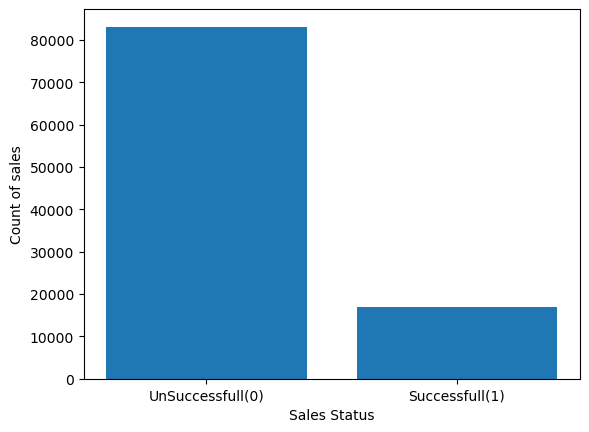

In [17]:
plt.bar(x=["UnSuccessfull(0)","Successfull(1)"] ,height=df.Converted.value_counts().values)
plt.title=("Sales Pitch Successfull and UnSuccessfull")
plt.xlabel("Sales Status")
plt.ylabel("Count of sales")
plt.show()

### total order value of successfull and unsuccessful pitches

In [23]:
# Order Value
unsuccessTotal = df[df.Converted == 0]["Order Value"].sum()
unsuccessTotal

420582009

In [25]:
successTotal = df[df.Converted == 1]["Order Value"].sum()
successTotal

85712421

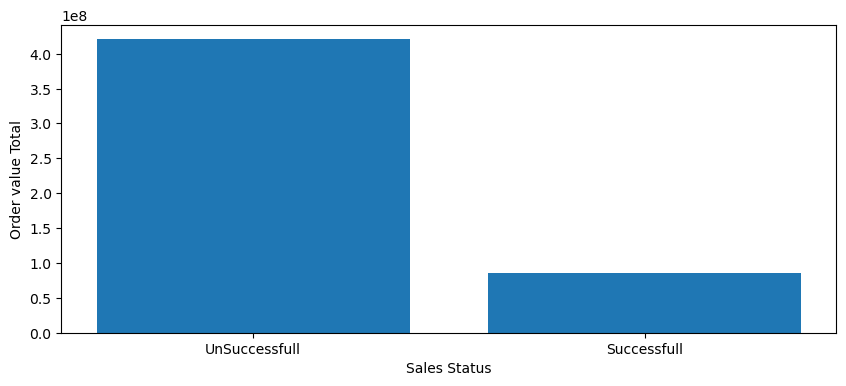

In [39]:

plt.figure(figsize=(10,4))
plt.bar(x=["UnSuccessfull","Successfull"] ,height=[unsuccessTotal,successTotal])
plt.title=("Order Total Successfull and UnSuccessfull")
plt.ylabel("Order value Total")
plt.xlabel("Sales Status")

plt.show()


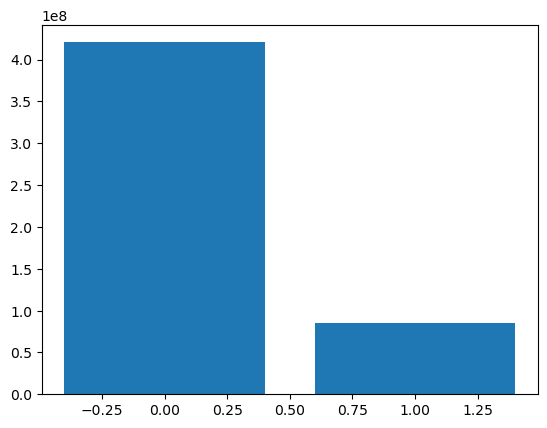

In [43]:
a = df.groupby("Converted")["Order Value"].agg("sum")
plt.bar(x=a.index,height=a.values)
plt.show()

In [44]:
df.head()

,Order Id,Company Id,Company Name,Date,Order Value,Converted,Sales Rep,Sales Rep Id
0,HZSXLI1IS9RGABZW,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-10-13,6952,0,William Taylor,ZTZA0ZLYZR85PTUJ
1,582WPS3OW8T6YT0R,D0AUXPP07H6AVSGD,Melancholy Social-Role,2017-09-02,7930,0,William Taylor,ZTZA0ZLYZR85PTUJ
2,KRF65MQZBOYG4Y9T,D0AUXPP07H6AVSGD,Melancholy Social-Role,2016-12-21,5538,1,William Taylor,ZTZA0ZLYZR85PTUJ
3,N3EDZ5V1WGSWW828,D0AUXPP07H6AVSGD,Melancholy Social-Role,2018-06-03,1113,0,William Taylor,ZTZA0ZLYZR85PTUJ
4,QXBC8COXEXGFSPLP,D0AUXPP07H6AVSGD,Melancholy Social-Role,2014-07-26,4596,0,William Taylor,ZTZA0ZLYZR85PTUJ


In [45]:
# top most sales man

In [63]:
salesrec = df.groupby("Sales Rep")["Order Value"].sum()
salesrec.sort_values(ascending=False)

Sales Rep
Alyssa Mckinney     2172439
Jessica Renner      2161540
Elizabeth Gaddy     2147581
Christina Clark     2134452
Fidel Carbo         2115456
                     ...   
Linda Thomas          81914
Ginger Wright         79366
Robert Bowen          70885
Debra Vermillion      63933
Simon Hearn           59732
Name: Order Value, Length: 499, dtype: int64

In [66]:
succsalesrec = df[df.Converted ==1 ].groupby("Sales Rep")["Order Value"].sum()
succsalesrec.sort_values(ascending=False).index[0]

'Margaret Lott'

### most bad sales man

In [71]:
succsalesrec = df[df.Converted ==1 ].groupby("Sales Rep")["Order Value"].sum()
succsalesrec.sort_values().index[0]

'Richard Nicols'

### min and max of order value of successful pitches

In [82]:
minmax = df[df.Converted==1].groupby("Sales Rep")["Order Value"].agg(["min","max"]).sort_values(ascending=False,by="max")
minmax

,min,max
Sales Rep,,
Paula Flores,607,9999
Amy Jernigan,350,9999
Carolyn Rea,281,9997
Gary Castle,1354,9996
Maria Martin,326,9996
...,...,...
Debra Vermillion,3613,4362
Mary Brooks,2540,3164
Beatrice Mccormick,1036,2701
